In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Fitness_Plan_Dataset.csv")
df

,Fitness_Goals,Current_Fitness_Metrics,Activity_Level,Dietary_Preferences,Recommended_Plan
0,Endurance Improvement,34.8,Sedentary,Low-Carb,Mixed Plan
1,Weight Loss,29.1,Highly Active,Non-Vegetarian,Cardio Plan
2,Weight Loss,27.7,Highly Active,Vegetarian,Strength Plan
3,Endurance Improvement,29.8,Sedentary,Vegetarian,Cardio Plan
4,Muscle Gain,32.4,Sedentary,Non-Vegetarian,Strength Plan
...,...,...,...,...,...
95,Weight Loss,22.2,Highly Active,Vegan,Strength Plan
96,Weight Loss,24.1,Moderately Active,Low-Carb,Cardio Plan
97,Muscle Gain,28.2,Sedentary,Non-Vegetarian,Strength Plan
98,Muscle Gain,22.3,Sedentary,Vegan,Mixed Plan


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fitness_Goals            100 non-null    object 
 1   Current_Fitness_Metrics  100 non-null    float64
 2   Activity_Level           100 non-null    object 
 3   Dietary_Preferences      100 non-null    object 
 4   Recommended_Plan         100 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.0+ KB


In [4]:
df.shape

(100, 5)

In [5]:
df.columns

Index(['Fitness_Goals', 'Current_Fitness_Metrics', 'Activity_Level',
       'Dietary_Preferences', 'Recommended_Plan'],
      dtype='object')

In [6]:
#Before Label Encoding
for c in df.columns:
    print(c,df[c].unique())
    print("-"*60)

Fitness_Goals ['Endurance Improvement' 'Weight Loss' 'Muscle Gain']
------------------------------------------------------------
Current_Fitness_Metrics [34.8 29.1 27.7 29.8 32.4 31.3 22.3 19.  23.7 22.9 22.  34.1 33.  29.3
 25.  33.6 26.1 22.6 27.8 22.8 28.1 33.3 25.1 22.1 35.  26.9 20.  19.3
 20.3 28.9 31.6 25.5 19.5 24.8 34.9 27.2 34.5 32.7 18.7 30.4 29.7 27.4
 25.7 26.  34.2 26.8 21.4 32.9 23.4 29.  28.5 21.  31.1 27.3 18.5 23.8
 18.8 33.8 32.2 23.6 19.9 26.5 19.6 31.  20.6 26.3 27.6 30.5 21.8 29.2
 27.  20.5 22.2 24.1 28.2]
------------------------------------------------------------
Activity_Level ['Sedentary' 'Highly Active' 'Moderately Active']
------------------------------------------------------------
Dietary_Preferences ['Low-Carb' 'Non-Vegetarian' 'Vegetarian' 'Vegan']
------------------------------------------------------------
Recommended_Plan ['Mixed Plan' 'Cardio Plan' 'Strength Plan']
------------------------------------------------------------


In [7]:
if (df.isnull().values.any()):
    print("Yes")
    print("-"*40)
    print(df.isnull().sum())
else:
    print("No")
    print("-"*40)
    print(df.isnull().sum())

No
----------------------------------------
Fitness_Goals              0
Current_Fitness_Metrics    0
Activity_Level             0
Dietary_Preferences        0
Recommended_Plan           0
dtype: int64


In [8]:
df.describe()

,Current_Fitness_Metrics
count,100.000000
mean,26.752000
std,4.882798
min,18.500000
25%,22.750000
50%,26.850000
75%,31.100000
max,35.000000


In [9]:
label=LabelEncoder()
label

LabelEncoder()

In [10]:
df["Fitness_Goals"]=label.fit_transform(df["Fitness_Goals"])
df["Activity_Level"]=label.fit_transform(df["Activity_Level"])
df["Dietary_Preferences"]=label.fit_transform(df["Dietary_Preferences"])
df["Recommended_Plan"]=label.fit_transform(df["Recommended_Plan"])
df


,Fitness_Goals,Current_Fitness_Metrics,Activity_Level,Dietary_Preferences,Recommended_Plan
0,0,34.8,2,0,1
1,2,29.1,0,1,0
2,2,27.7,0,3,2
3,0,29.8,2,3,0
4,1,32.4,2,1,2
...,...,...,...,...,...
95,2,22.2,0,2,2
96,2,24.1,1,0,0
97,1,28.2,2,1,2
98,1,22.3,2,2,1


In [11]:
x=df[["Fitness_Goals","Current_Fitness_Metrics","Activity_Level","Dietary_Preferences"]]
y=df[["Recommended_Plan"]].values
y

array([[1],
       [0],
       [2],
       [0],
       [2],
       [0],
       [0],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [1],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [0],
       [0],
       [2],
       [0],
       [1],
       [2],
       [0],
       [0],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [0],
       [2],
       [1],
       [0],
       [2],
       [0],
       [1],
       [2],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [2],
       [2],
       [0],
       [1],
       [2],
       [1],
       [2],
       [1],
       [0],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [0],
       [0],
       [2],
    

In [12]:
scaler=MinMaxScaler()
scaler

MinMaxScaler()

In [13]:
#After Label Encoding
for co in df.columns:
    print(co,df[co].unique())
    print("-"*60)

Fitness_Goals [0 2 1]
------------------------------------------------------------
Current_Fitness_Metrics [34.8 29.1 27.7 29.8 32.4 31.3 22.3 19.  23.7 22.9 22.  34.1 33.  29.3
 25.  33.6 26.1 22.6 27.8 22.8 28.1 33.3 25.1 22.1 35.  26.9 20.  19.3
 20.3 28.9 31.6 25.5 19.5 24.8 34.9 27.2 34.5 32.7 18.7 30.4 29.7 27.4
 25.7 26.  34.2 26.8 21.4 32.9 23.4 29.  28.5 21.  31.1 27.3 18.5 23.8
 18.8 33.8 32.2 23.6 19.9 26.5 19.6 31.  20.6 26.3 27.6 30.5 21.8 29.2
 27.  20.5 22.2 24.1 28.2]
------------------------------------------------------------
Activity_Level [2 0 1]
------------------------------------------------------------
Dietary_Preferences [0 1 3 2]
------------------------------------------------------------
Recommended_Plan [1 0 2]
------------------------------------------------------------


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,Fitness_Goals,Current_Fitness_Metrics,Activity_Level,Dietary_Preferences
55,0,32.9,2,0
88,0,21.8,1,1
26,0,35.0,2,3
42,2,29.7,1,2
69,0,32.2,2,3
...,...,...,...,...
60,1,31.1,0,2
71,1,19.5,2,3
14,0,29.3,2,2
92,2,25.7,0,0


In [15]:
knn=KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

In [16]:
knn.fit(x_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [17]:
mapping = {0: "Cardio Plan", 1: "Mixed Plan", 2: "Strength Plan"}
predicted=knn.predict(x_test)
pred=[mapping[value] for value in predicted]
pred


['Strength Plan',
 'Mixed Plan',
 'Mixed Plan',
 'Mixed Plan',
 'Mixed Plan',
 'Strength Plan',
 'Mixed Plan',
 'Strength Plan',
 'Mixed Plan',
 'Mixed Plan',
 'Strength Plan',
 'Strength Plan',
 'Mixed Plan',
 'Strength Plan',
 'Mixed Plan',
 'Strength Plan',
 'Strength Plan',
 'Strength Plan',
 'Strength Plan',
 'Mixed Plan']

In [18]:
predicted

array([2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1])

In [19]:
predicted=predicted.reshape(20,-1)
predicted

array([[2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1]])

In [20]:
dfr={'Numerical Prediction':[2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1]
,"Categorical Prediction":['Strength Plan',
 'Mixed Plan',
 'Mixed Plan',
 'Mixed Plan',
 'Mixed Plan',
 'Strength Plan',
 'Mixed Plan',
 'Strength Plan',
 'Mixed Plan',
 'Mixed Plan',
 'Strength Plan',
 'Strength Plan',
 'Mixed Plan',
 'Strength Plan',
 'Mixed Plan',
 'Strength Plan',
 'Strength Plan',
 'Strength Plan',
 'Strength Plan',
 'Mixed Plan']}
dfr

{'Numerical Prediction': [2,
  1,
  1,
  1,
  1,
  2,
  1,
  2,
  1,
  1,
  2,
  2,
  1,
  2,
  1,
  2,
  2,
  2,
  2,
  1],
 'Categorical Prediction': ['Strength Plan',
  'Mixed Plan',
  'Mixed Plan',
  'Mixed Plan',
  'Mixed Plan',
  'Strength Plan',
  'Mixed Plan',
  'Strength Plan',
  'Mixed Plan',
  'Mixed Plan',
  'Strength Plan',
  'Strength Plan',
  'Mixed Plan',
  'Strength Plan',
  'Mixed Plan',
  'Strength Plan',
  'Strength Plan',
  'Strength Plan',
  'Strength Plan',
  'Mixed Plan']}

In [21]:
dfr=pd.DataFrame(dfr)
dfr

,Numerical Prediction,Categorical Prediction
0,2,Strength Plan
1,1,Mixed Plan
2,1,Mixed Plan
3,1,Mixed Plan
4,1,Mixed Plan
5,2,Strength Plan
6,1,Mixed Plan
7,2,Strength Plan
8,1,Mixed Plan
9,1,Mixed Plan


In [22]:
manual_pred=knn.predict([[0,32.9,2,0]])
if manual_pred==0:
    print(manual_pred,": Cardio Plan")
elif manual_pred==1:
    print(manual_pred,": Mixed Plan")
else:
    print(manual_pred,": Strength Plan")

[2] : Strength Plan


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [23]:
cm=confusion_matrix(y_test,predicted)
print(cm)

[[0 1 5]
 [0 6 2]
 [0 3 3]]


In [24]:
cm.shape

(3, 3)

In [25]:
acc=accuracy_score(y_test,predicted)
acc

0.45

In [26]:
print(classification_report(y_test,predicted))

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.60      0.75      0.67         8
           2       0.30      0.50      0.37         6

    accuracy                           0.45        20
   macro avg       0.30      0.42      0.35        20
weighted avg       0.33      0.45      0.38        20



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


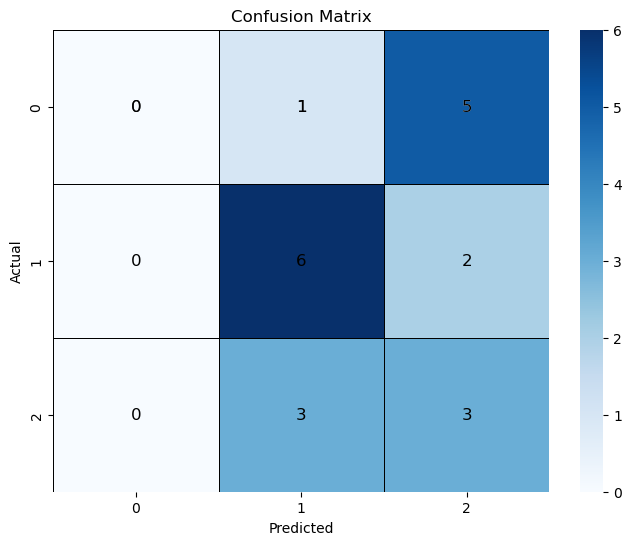

In [27]:
plt.figure(figsize=(8, 6))
ax=sns.heatmap(cm,annot=True,fmt="d", cmap="Blues", cbar=True,annot_kws={"size": 12}, linewidths=.5, linecolor='black')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j + 0.5, i + 0.5, str(cm[i, j]), ha='center', va='center', size=12, color='black')

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()